1. Importando bibliotecas (não esquecer de instalá-las com pip intall)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

2. Carregando e mostrando imagens

(653, 838, 4)
(238, 212)
(1184, 820, 3)
(1109, 860, 4)


<Axes: >

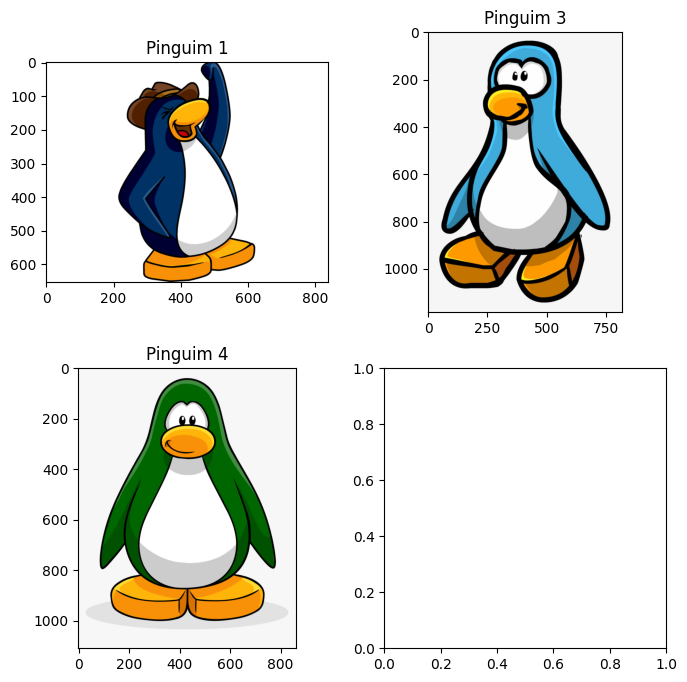

In [17]:
img_p1 = np.array(Image.open('P1.png')) 
img_p2 = np.array(Image.open('P2.png'))
img_p3 = np.array(Image.open('P3.jpg'))
img_p4 = np.array(Image.open('P4.png'))

print(img_p1.shape)
print(img_p2.shape)
print(img_p3.shape)
print(img_p4.shape)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Pinguim 1')
plt.imshow(img_p1)
plt.subplot(2,2,2)
plt.title('Pinguim 2')
plt.imshow(img_p2)
plt.title('Pinguim 3')
plt.imshow(img_p3)
plt.subplot(2,2,3)
plt.title('Pinguim 4')
plt.imshow(img_p4)
plt.subplot(2,2,4)

3. Juntando todas as imagens em uma só

In [19]:
img_and = img_p1 | img_p2 | img_p3 | img_p4

plt.title('Imagens Juntas')
plt.imshow(img_and)

ValueError: operands could not be broadcast together with shapes (653,838,4) (238,212) 

4. Trocando as cores das imagens de RBG para CMY

In [21]:
(l, c, p) = img_p1.shape
(l, c, p) = img_p2.shape
(l, c, p) = img_p3.shape
(l, c, p) = img_p4.shape

img_save = None
def rgb_cmy(img_rgb):
    img_cmy = np.zeros(shape=img_rgb.shape, dtype=np.float64)
    for i in range(l):
        for j in range(c):
            r = img_rgb[i, j, 0]
            g = img_rgb[i, j, 1]
            b = img_rgb[i, j, 2]
            
            img_cmy[i, j, 0] = (255 - r) / 255 # C
            img_cmy[i, j, 1] = (255 - g) / 255 # M
            img_cmy[i, j, 2] = (255 - b) / 255 # Y
            
    img_save = img_cmy
    return img_cmy

img_p1_cmy = rgb_cmy(img_p1)
img_p2_cmy = rgb_cmy(img_p2)
img_p3_cmy = rgb_cmy(img_p1)
img_p4_cmy = rgb_cmy(img_p1)

print(img_p1.shape)
print(img_p2.shape)
print(img_p3.shape)
print(img_p4.shape)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Pinguim 1')
plt.imshow(img_p1_cmy)
plt.subplot(2,2,2)
plt.title('Pinguim 2')
plt.imshow(img_p2_cmy)
plt.title('Pinguim 3')
plt.imshow(img_p3_cmy)
plt.subplot(2,1,1)
plt.title('Pinguim 4')
plt.imshow(img_p4_cmy)
plt.subplot(2,1,2)

ValueError: not enough values to unpack (expected 3, got 2)

5. Espelhando as imagens

In [22]:
img_p1_espelhada = np.zeros(shape=img_techno.shape, dtype=np.uint8)
img_p2_espelhada = np.zeros(shape=img_techno.shape, dtype=np.uint8)
img_p3_espelhada = np.zeros(shape=img_techno.shape, dtype=np.uint8)
img_p4_espelhada = np.zeros(shape=img_techno.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        img_p1_espelhada[new_y, new_x] = img_p1[i, j]
        img_p2_espelhada[new_y, new_x] = img_p2[i, j]
        img_p3_espelhada[new_y, new_x] = img_p3[i, j]
        img_p4_espelhada[new_y, new_x] = img_p4[i, j]

plt.imshow(refl)

print(img_p1.shape)
print(img_p2.shape)
print(img_p3.shape)
print(img_p4.shape)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Pinguim 1')
plt.imshow(img_p1_espelhada)
plt.subplot(2,2,2)
plt.title('Pinguim 2')
plt.imshow(img_p2_espelhada)
plt.title('Pinguim 3')
plt.imshow(img_p3_espelhada)
plt.subplot(2,1,1)
plt.title('Pinguim 4')
plt.imshow(img_p4_espelhada)
plt.subplot(2,1,2)

NameError: name 'img_techno' is not defined

6. Recortando uma das imagens

In [23]:
img_p4 = img_p4[:, :, :3]

def roberts_cross(img):
    kernel_x = np.array([[1, 0], [ 0, -1]], dtype=np.float64)
    kernel_y = np.array([[0, 1], [-1,  0]], dtype=np.float64)
    
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient

img_p4_cut = roberts_cross(img_p4)
plt.figure(figsize=(16, 16))
plt.imshow(img_p4_cut)

NameError: name 'conv' is not defined

7. Realizando histograma e threshold de uma imagem

ValueError: too many values to unpack (expected 2)

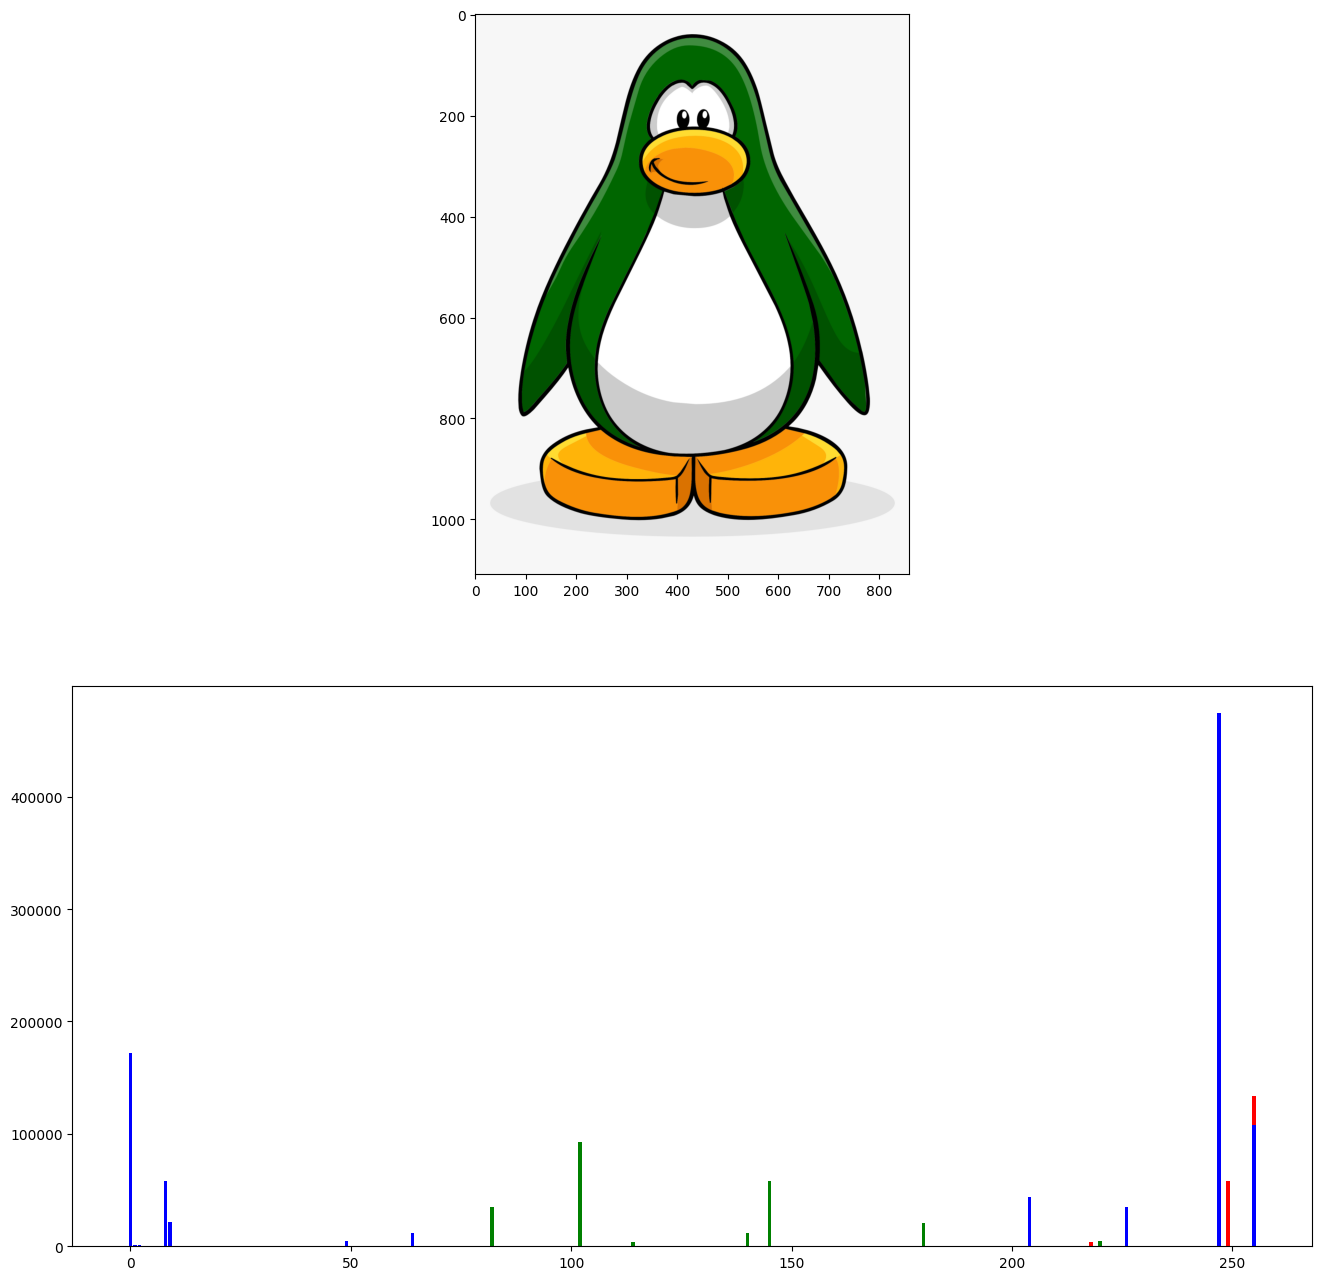

In [24]:
def histogram_gray(img):
    (l, c) = img.shape

    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

show_histogram(img_p4)
show_histogram_gray(img_p4)


8. Mudando cor de fundo

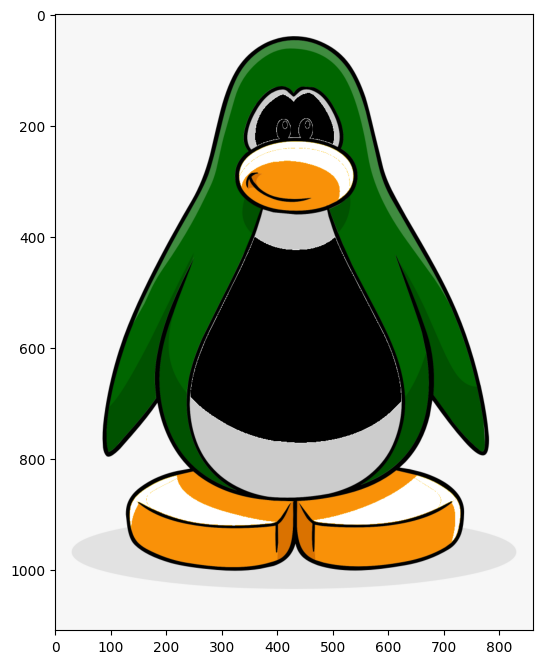

In [37]:
img_p4 = img_p4[:, :, :3]

red_mask = (img_p4[:, :, 0] == 255)
green_mask = (img_p4[:, :, 1] == 255)
blue_mask = (img_p4[:, :, 2] == 255)

img_p4[red_mask] = 0
img_p4[green_mask] = 0
img_p4[blue_mask] = 255

plt.figure(figsize=(8, 8))
plt.imshow(img_p4)